#ANOVA con interacción

Medición de la circunferencia de la cabeza fetal, realizada por cuatro observadores en tres fetos, de un estudio que investigó la reproducibilidad de los datos de la circunferencia de la cabeza fetal obtenidos mediante ecografía.

In [504]:
!pip install pingouin
import numpy as np
import pandas as pd
import pingouin as pg
#aditional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import seaborn as sns
import matplotlib.pyplot as plt

In [505]:
#Get the data
infile = 'altman_12_6.txt'
data = np.genfromtxt(infile, delimiter=',')

In [506]:
#Bring them in Dataframe-format
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])
df.head()

,hs,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0


In [507]:
#Use ANOVA with interaction, either with statsmodels

formula='hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
sm_results = anova_lm(lm)
print(sm_results.round(4))

                        df    sum_sq   mean_sq          F  PR(>F)
C(fetus)               2.0  324.0089  162.0044  2113.1014  0.0000
C(observer)            3.0    1.1986    0.3995     5.2114  0.0065
C(fetus):C(observer)   6.0    0.5622    0.0937     1.2222  0.3296
Residual              24.0    1.8400    0.0767        NaN     NaN


In [508]:
# ... or with pingouin

pg_results = pg.anova(dv='hs', between=['fetus', 'observer'],
data=df)
print(sm_results.round(4))

                        df    sum_sq   mean_sq          F  PR(>F)
C(fetus)               2.0  324.0089  162.0044  2113.1014  0.0000
C(observer)            3.0    1.1986    0.3995     5.2114  0.0065
C(fetus):C(observer)   6.0    0.5622    0.0937     1.2222  0.3296
Residual              24.0    1.8400    0.0767        NaN     NaN


# Resultados del ANOVA de dos vías

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *fetus* y *observer*, así como su interacción.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *fetus* y *observer*, y la variable dependiente es *hs*. La interpretación de cada componenete es la siguiente:

## 1. C(fetus)


*   **Grados de libertad (df):** 2.0, correspondientes a tres grupos de *fetus*
*   **Suma de cuadrados (sum_sq):** 324.0089, que representa la variación explicada por el factor *fetus*

*   **Media cuadrática(mean_sq):** 162.0044, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 2113.1014, que indica un impacto muy significativo del factor *fetus*

*   **Valor p (PR(>F)):** 1.051e-27, muy por debajo de 0.05, lo que signific que el factor *fetus* tiene un efecto altamente significativo sobre la variable dependiente.


##2. C(observer)

*   **Grados de libertad (df):** 3.0, correspondientes a cuatro observadores.
*   **Suma de cuadrados (sum_sq):** 1.1986, que representa la variación explicada por los diferentes observadores
*   **Media cuadrática(mean_sq):** 0.3995
*   **Valor F:** 5.2114, un valor moderadamente alto
*   **Valor p(PR(>F)):** 0.0065, lo que indica que los observadores tienen un efecto significativo sobre la variable dependiente


##3. C(fetus):C(observer) (Interacción):

*   **Grados de libertad(df):** 6.0, correspondientes a la interacción entre *fetus* y *observer*
*   **Suma de cuadrados (sum_sq):**0.0937
*   **Media cuadrática (mean_sq):** 0.0937
*   **Valor F:** 1.2222, que indica que la interacción no es significativa.
*   **Valor p(PR(>F)):** 0.3296, mayor que 0.05, lo que sugiere que no hay interacción significativa entre *fetus* y *observer*

#4. Residual:

*   **Grados de libertad(df):** 24.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 1.8400, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq):0.0767


#Conclusiones:

* El factor **fetus** tiene un efecto altamente significativo sobre la variable dependiente *hs* (valor $p<0.05$)
*   El factor **observer** también tiene un efecto significativo, pero su impacto es mucho menor que el de *fetus*
*  **No existe ua interacción significtiva** entre *fetus* y *observer* (valor p >0.05), lo que indica que el efceto de *fetus* no depende del observador.
* La variación residual es pequeña, lo que significa que la mayor parte de la variación en los datos esexplicada por los factores incluidos en el análisis.














---



---



---



#Ejercicio 1

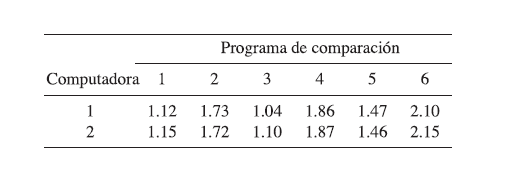

In [509]:
#Datos
tiempo=[1.12,1.73,1.04,1.86,1.47,2.10,1.15,1.72,1.10,1.87,1.46,2.15]
computadora=[1,1,1,1,1,1,2,2,2,2,2,2]
programa=[1,2,3,4,5,6,1,2,3,4,5,6]

In [510]:
df=pd.DataFrame({'tiempo':tiempo,'computadora':computadora,'programa':programa})
df

,tiempo,computadora,programa
0,1.12,1,1
1,1.73,1,2
2,1.04,1,3
3,1.86,1,4
4,1.47,1,5
5,2.10,1,6
6,1.15,2,1
7,1.72,2,2
8,1.10,2,3
9,1.87,2,4


#Modelo con interacciones

In [511]:
formula='tiempo ~C(programa)+C(computadora)+C(programa):C(computadora)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                             df        sum_sq   mean_sq    F  PR(>F)
C(programa)                 5.0  1.738242e+00  0.347648  0.0     NaN
C(computadora)              1.0  1.408333e-03  0.001408  0.0     NaN
C(programa):C(computadora)  5.0  2.241667e-03  0.000448  0.0     NaN
Residual                    0.0  5.817849e-30       inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Debido a que se tiene la siguiente información sobre los grados de libertad


1.   El factor 'programa' tiene 6 niveles, i.e., 5df
2.   El factor (Bloques) 'computadora' tiene 2 niveles, i.e., 1df
3.   La interacción 'programa':'computadora' tiene 6 niveles, i.e., 5 df

Por lo tanto, el total de residuales es 5+1+5=11 df y como tenemos 12 observaciones, entonces los grados de libertad de los residuales son df_residuales=(12-1)-11=0.

En este caso se recomeinda:



*   Agregar más observaciones o...
*   Eliminar la componente de interacción







# Modelo sin interacciones

In [512]:
#Use ANOVA with interaction, either with statsmodels...
formula='tiempo ~C(programa)+C(computadora)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

                 df    sum_sq   mean_sq           F        PR(>F)
C(programa)     5.0  1.738242  0.347648  775.423792  3.229626e-07
C(computadora)  1.0  0.001408  0.001408    3.141264  1.365317e-01
Residual        5.0  0.002242  0.000448         NaN           NaN
0.1365317092461205


<ipython-input-512-8e80b7e71ffe>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

No existe evidencia para afirmar que la media de las computadoras es diferente. Sin embargo las medias de los programas son diferentes.

In [513]:
#... or with pingouin
pg_results = pg.anova(dv='tiempo', between=['programa','computadora'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,programa,1.738242,5,0.347648,1.0
1,computadora,0.001408,1,0.001408,1.0
2,programa * computadora,0.002242,5,0.000448,1.0
3,Residual,0.000000,0,NaN,NaN


Text(0.5, 1.0, 'programa vs tiempo')

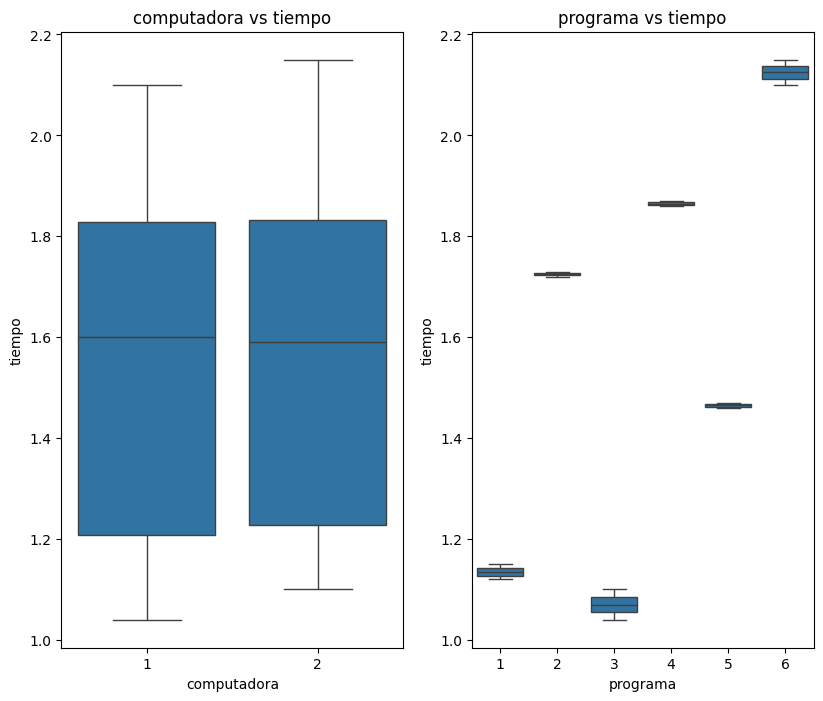

In [514]:
#Boxplot 1: computadora vs tiempo
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(x='computadora',y='tiempo',data=df)
plt.title('computadora vs tiempo')
#Boxplot 2: programa vs tiempo
plt.subplot(1,3,2)
sns.boxplot(x='programa',y='tiempo',data=df)
plt.title('programa vs tiempo')


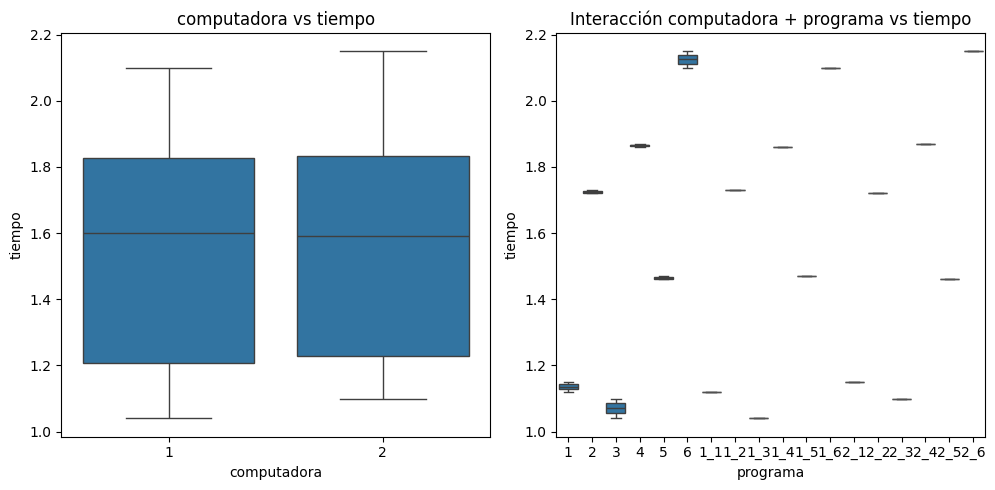

In [515]:
#Boxplot 1: computadora vs tiempo
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='computadora',y='tiempo',data=df)
plt.title('computadora vs tiempo')

#Boxplot 2: programa vs tiempo
plt.subplot(1,3,2)
sns.boxplot(x='programa',y='tiempo',data=df)
plt.title('programa vs tiempo')

#Boxplot 3: Interacción computadora + programa vs tiempo
df['computadora'+'_'+'programa']=df['computadora'].astype(str)+'_'+df['programa'].astype(str) #crear columna para la interacción
sns.boxplot(x='computadora'+'_'+'programa',y='tiempo',data=df)
plt.title('Interacción computadora + programa vs tiempo')

plt.tight_layout()
plt.show()

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *programa* y *computadora*.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *computadora* y *programa*, y la variable dependiente es *tiempo*. La interpretación de cada componenete es la siguiente:

## 1. C(computadora)


*   **Grados de libertad (df):** 1.0, correspondientes a dos grupos de *computadora*
*   **Suma de cuadrados (sum_sq):** 0.0014, que representa la variación explicada por el factor *computadora*

*   **Media cuadrática(mean_sq):** 0.0014, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 3.1412, que indica un impacto poco significativo del factor *computadora*

*   **Valor p (PR(>F)):** 1.3653e-01, arriba de 0.05, lo que significa que no hay un efecto significativo sobre la variable dependiente.


##2. C(programa)

*   **Grados de libertad (df):** 5.0, correspondientes a seis programas.

*   **Suma de cuadrados (sum_sq):** 1.7382, que representa la variación explicada por los diferentes observadores

*   **Media cuadrática(mean_sq):** 0.3476

*   **Valor F:** 775.4237, un valor muy alto; que indica un impacto muy significativo por parte de *programa*

*   **Valor p(PR(>F)):** 3.2296e-07, lo que indica que los observadores tienen un efecto significativo sobre la variable dependiente


#4. Residual:

*   **Grados de libertad(df):** 5.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 0.0022, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq):0.0004


#Conclusiones:

* El factor **programa** tiene un efecto altamente significativo sobre la variable dependiente *tiempo* (valor $p<0.05$)
*   El factor **computadora**, por su parte,  no posee un efecto significativo en el *tiempo*.

* La variación residual es pequeña, lo que significa que la mayor parte de la variación en los datos es explicada por los factores incluidos en el análisis.














---



---



---



---

#Ejercicio 2

La siguiente tabla presenta datos de producción que se relacioann con la resistencia a las manchas, para tres materiales (M1, M2,M3) tratados con 4 productos químicos en un diseño de bloques aleatorizado. (Un valor bajo indica buena resistencia a las manchas).


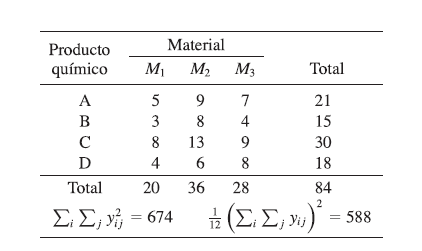


In [516]:
#Datos
Resistencia=[5,9,7,3,8,4,8,13,9,4,6,8]
Prod_Quimico=['A','A','A','B','B','B','C','C','C','D','D','D']
Material=['M1','M2','M3','M1','M2','M3','M1','M2','M3','M1','M2','M3']

In [517]:
df=pd.DataFrame({'Resistencia':Resistencia,'Prod_Quimico':Prod_Quimico,'Material':Material})
df

,Resistencia,Prod_Quimico,Material
0,5,A,M1
1,9,A,M2
2,7,A,M3
3,3,B,M1
4,8,B,M2
5,4,B,M3
6,8,C,M1
7,13,C,M2
8,9,C,M3
9,4,D,M1


#Modelo con interacciones

In [518]:
formula='Resistencia ~C(Material)+C(Prod_Quimico)+C(Material):C(Prod_Quimico)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                              df        sum_sq  mean_sq    F  PR(>F)
C(Material)                  2.0  3.200000e+01     16.0  0.0     NaN
C(Prod_Quimico)              3.0  4.200000e+01     14.0  0.0     NaN
C(Material):C(Prod_Quimico)  6.0  1.200000e+01      2.0  0.0     NaN
Residual                     0.0  5.200566e-28      inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [519]:
#Use ANOVA with interaction, either with statsmodels...
formula='Resistencia ~C(Material)+C(Prod_Quimico)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

                  df  sum_sq  mean_sq    F    PR(>F)
C(Material)      2.0    32.0     16.0  8.0  0.020285
C(Prod_Quimico)  3.0    42.0     14.0  7.0  0.021907
Residual         6.0    12.0      2.0  NaN       NaN
0.02190675125938661


<ipython-input-519-d58bd675e6ca>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [520]:
#... or with pingouin
pg_results = pg.anova(dv='Resistencia', between=['Material','Prod_Quimico'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Material,32.0,2,16.0,1.0
1,Prod_Quimico,42.0,3,14.0,1.0
2,Material * Prod_Quimico,12.0,6,2.0,1.0
3,Residual,0.0,0,NaN,NaN


Text(0.5, 1.0, 'Material vs Resistencia')

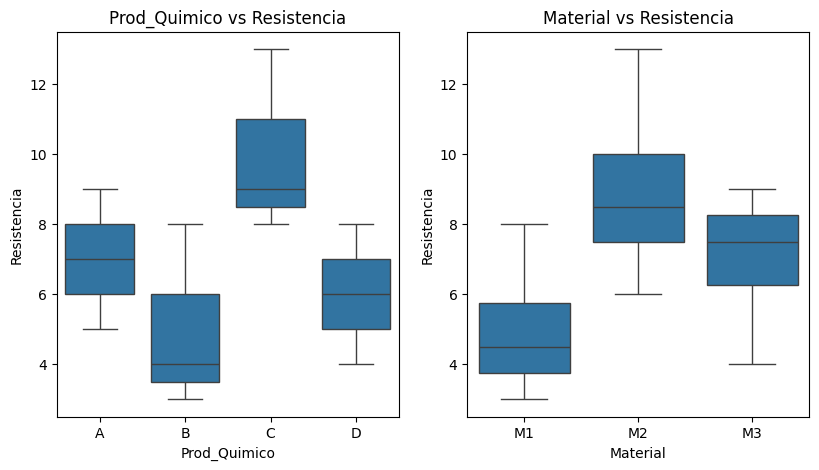

In [521]:
#Boxplot 1: computadora vs tiempo
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='Prod_Quimico',y='Resistencia',data=df)
plt.title('Prod_Quimico vs Resistencia')
#Boxplot 2: programa vs tiempo
plt.subplot(1,3,2)
sns.boxplot(x='Material',y='Resistencia',data=df)
plt.title('Material vs Resistencia')


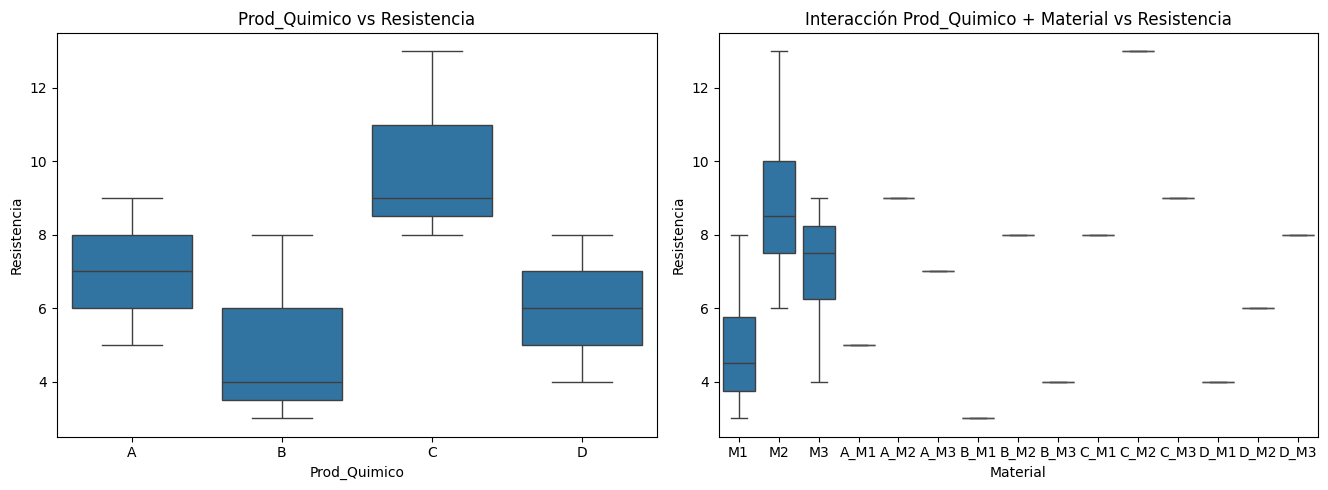

In [522]:
#Boxplot 1: computadora vs Resistencia
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='Prod_Quimico',y='Resistencia',data=df)
plt.title('Prod_Quimico vs Resistencia')

#Boxplot 2: Material vs Resistencia
plt.subplot(1,3,2)
sns.boxplot(x='Material',y='Resistencia',data=df)
plt.title('Material vs Resistencia')

#Boxplot 3: Interacción computadora + Material vs Resistencia
df['Prod_Quimico'+'_'+'Material']=df['Prod_Quimico'].astype(str)+'_'+df['Material'].astype(str) #crear columna para la interacción
sns.boxplot(x='Prod_Quimico'+'_'+'Material',y='Resistencia',data=df)
plt.title('Interacción Prod_Quimico + Material vs Resistencia')


plt.tight_layout()
plt.show()

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *Prod_Quimico* y *Material*.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *Prod_Quimico* y *Material*, y la variable dependiente es *Resistencia*. La interpretación de cada componenete es la siguiente:

## 1. C(Material)


*   **Grados de libertad (df):** 2.0, correspondientes a 3 tipo de *Material*
*   **Suma de cuadrados (sum_sq):** 32, que representa la variación explicada por el factor *Material*

*   **Media cuadrática(mean_sq):** 16, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 8, que indica un impacto medianamente significativo del factor *Material*

*   **Valor p (PR(>F)):** 0.020, abajo de 0.05, lo que significa que hay un efecto significativo sobre la variable dependiente.


##2. C(Prod_Quimico)

*   **Grados de libertad (df):** 3.0, correspondientes a 4 tipos de productos químicos.

*   **Suma de cuadrados (sum_sq):** 42, que representa la variación explicada por los diferentes observadores

*   **Media cuadrática(mean_sq):** 14

*   **Valor F:** 7, que indica un impacto medianamente significativo por parte de *Prod_Quimico*

*   **Valor p(PR(>F)):** 0.0219, lo que indica que los productos químicos tienen un efecto significativo sobre la variable dependiente


#4. Residual:

*   **Grados de libertad(df):** 6.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 12, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq):2.0


#Conclusiones:

* Los factores **Material** y **Prod_Quimico** tienen un efecto altamente significativo sobre la variable dependiente *Resistencia* (valor $p<0.05$).

* La variación residual es moderada, lo que significa que la no toda la variación en los datos es explicada por los factores incluidos en el análisis.














---



---



---

#Ejercicio 3
¿El promnedio de los costos de los seguros de automóviles difieren para diferentes compañías de seguros?
Otras variables que afectan los costos de los seguros son la ubicación geográfica, edades de los conductores y el tipo de cobertura. Las siguientes son estimaciones (en dólares) del costo de pólizas de 6 meses para cobertura de responsabilidad básica para un solo hombre que ha tenido licencia de manejo durante 6-8 años, no jha cometido infracciones ni ha tenido accidentes y viaja en auto entre 12,600 y 15,000 millas por año.

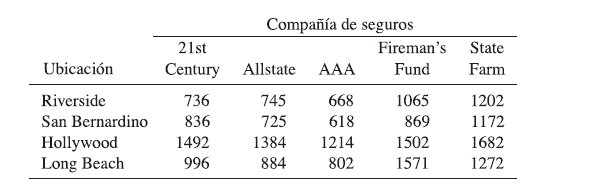



In [523]:
#Datos
Precio=[736,745,668,1065,1202,836,725,618,869,1172,1492,1384,1214,1502,1682,996,884,802,1571,1272]
Ubicacion=['Riverside','Riverside','Riverside','Riverside','Riverside', 'San Bernardino','San Bernardino','San Bernardino','San Bernardino','San Bernardino',
           'Hollywood', 'Hollywood','Hollywood','Hollywood','Hollywood', 'Long Beach', 'Long Beach', 'Long Beach', 'Long Beach', 'Long Beach', ]
Compañia=['Century', 'Allstate', 'AAA', 'Fireman', 'State Farm','Century', 'Allstate', 'AAA', 'Fireman', 'State Farm',
          'Century', 'Allstate', 'AAA', 'Fireman', 'State Farm','Century', 'Allstate', 'AAA', 'Fireman', 'State Farm']

In [524]:
df=pd.DataFrame({'Precio':Precio,'Ubicacion':Ubicacion,'Compañia':Compañia})
df

,Precio,Ubicacion,Compañia
0,736,Riverside,Century
1,745,Riverside,Allstate
2,668,Riverside,AAA
3,1065,Riverside,Fireman
4,1202,Riverside,State Farm
5,836,San Bernardino,Century
6,725,San Bernardino,Allstate
7,618,San Bernardino,AAA
8,869,San Bernardino,Fireman
9,1172,San Bernardino,State Farm


#Modelo con interacciones

In [525]:
formula='Precio ~C(Compañia)+C(Ubicacion)+C(Compañia):C(Ubicacion)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                            df        sum_sq       mean_sq    F  PR(>F)
C(Compañia)                4.0  7.313090e+05  1.828273e+05  0.0     NaN
C(Ubicacion)               3.0  1.176270e+06  3.920900e+05  0.0     NaN
C(Compañia):C(Ubicacion)  12.0  1.797686e+05  1.498072e+04  0.0     NaN
Residual                   0.0  2.710826e-22           inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [526]:
#Use ANOVA with interaction, either with statsmodels...
formula='Precio ~C(Compañia)+C(Ubicacion)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

                df      sum_sq        mean_sq          F    PR(>F)
C(Compañia)    4.0   731309.00  182827.250000  12.204172  0.000343
C(Ubicacion)   3.0  1176270.15  392090.050000  26.172983  0.000015
Residual      12.0   179768.60   14980.716667        NaN       NaN
1.4986313617835215e-05


<ipython-input-526-0c7612e02a97>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [527]:
#... or with pingouin
pg_results = pg.anova(dv='Precio', between=['Compañia','Ubicacion'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Compañia,731309.00,4,182827.250000,1.0
1,Ubicacion,1176270.15,3,392090.050000,1.0
2,Compañia * Ubicacion,179768.60,12,14980.716667,1.0
3,Residual,0.00,0,NaN,NaN


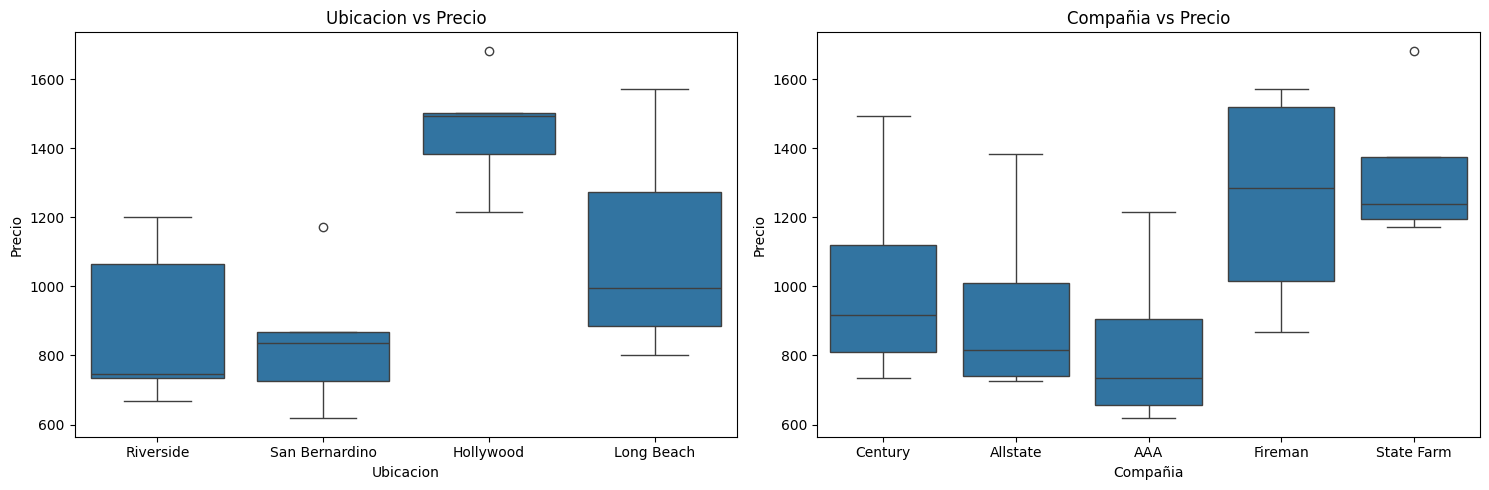

In [528]:
# Ajustar el tamaño de la figura para más espacio
plt.figure(figsize=(15,5))

# Boxplot 1: Ubicación vs Precio
plt.subplot(1, 2, 1)  # Cambié 1,3,1 a 1,2,1 para que sean dos gráficos en una fila
sns.boxplot(x='Ubicacion', y='Precio', data=df)
plt.title('Ubicacion vs Precio')

# Boxplot 2: Compañia vs Precio
plt.subplot(1, 2, 2)  # Cambié a 1,2,2 para el segundo gráfico
sns.boxplot(x='Compañia', y='Precio', data=df)
plt.title('Compañia vs Precio')

# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


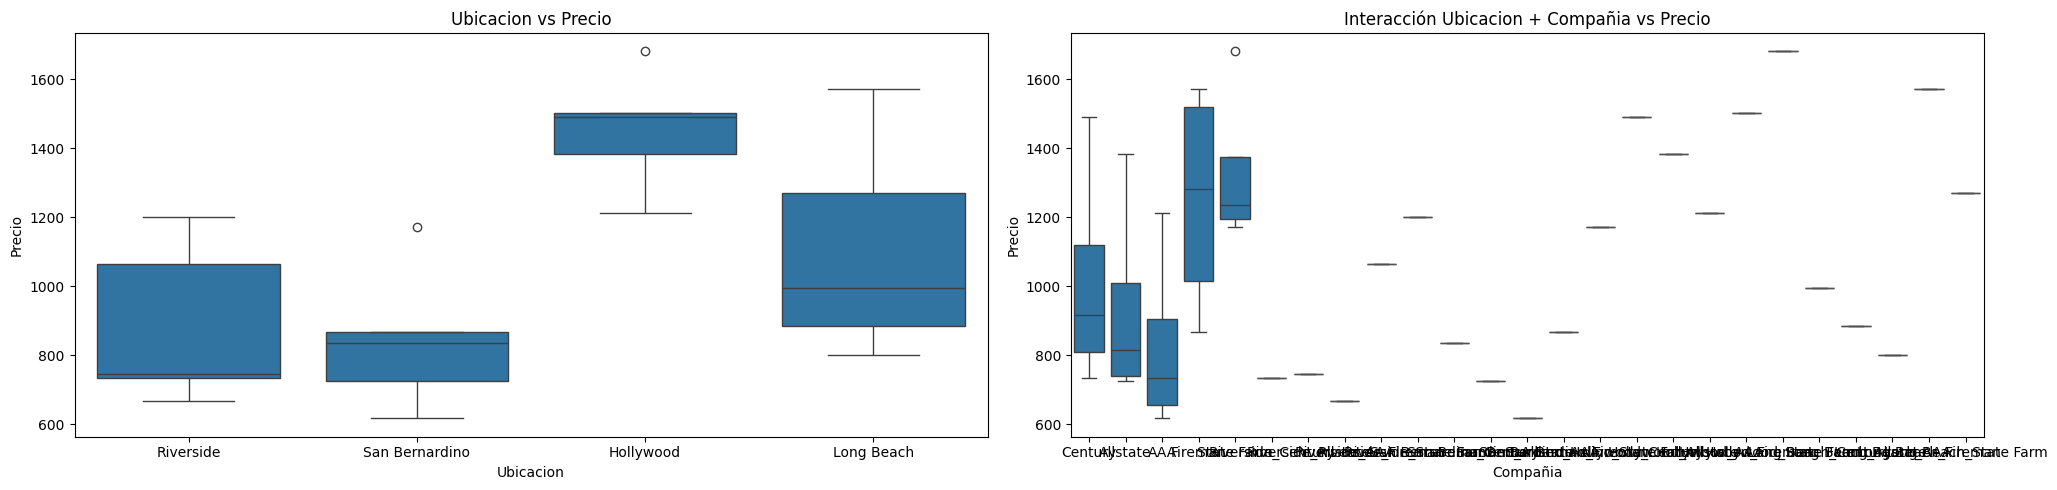

In [529]:
#Boxplot 1: Ubicacion vs Precio
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
sns.boxplot(x='Ubicacion',y='Precio',data=df)
plt.title('Ubicacion vs Precio')

#Boxplot 2: Compañia vs Precio
plt.subplot(1,3,2)
sns.boxplot(x='Compañia',y='Precio',data=df)
plt.title('Compañia vs Precio')

#Boxplot 3: Interacción Ubicacion + Compañia vs Precio
df['Ubicacion'+'_'+'Compañia']=df['Ubicacion'].astype(str)+'_'+df['Compañia'].astype(str) #crear columna para la interacción
sns.boxplot(x='Ubicacion'+'_'+'Compañia',y='Precio',data=df)
plt.title('Interacción Ubicacion + Compañia vs Precio')

plt.tight_layout()
plt.show()

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *Ubicación* y *Compañía*.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *Ubicación* y *Compañía*, y la variable dependiente es *Precio*. La interpretación de cada componenete es la siguiente:

## 1. C(Compañia)


*   **Grados de libertad (df):** 4.0, correspondientes a 5 *Compañías* diferentes.
*   **Suma de cuadrados (sum_sq):** 731,309.00, que representa la variación explicada por el factor *Compañia*

*   **Media cuadrática(mean_sq):** 182,827.2500, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 12, que indica un impacto medianamente significativo del factor *Compañia*

*   **Valor p (PR(>F)):** 0.000343, abajo de 0.05, lo que significa que hay un efecto significativo sobre la variable dependiente.


##2. C(Ubicacion)

*   **Grados de libertad (df):** 3.0, correspondientes a 4 ubicaciones distintas.

*   **Suma de cuadrados (sum_sq):** 1,176,270.15, que representa la variación explicada por las diferentes ubicaciones.

*   **Media cuadrática(mean_sq):** 392090.050

*   **Valor F:** 26.172983, que indica un impacto medianamente significativo por parte de *Ubicación*

*   **Valor p(PR(>F)):** 0.000015, lo que indica que los productos químicos tienen un efecto altamente significativo sobre la variable dependiente.


#4. Residual:

*   **Grados de libertad(df):** 12.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 179768.60, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq): 14,980.7166


#Conclusiones:

* Los factores **Compañia** y **Ubicación** tienen un efecto altamente significativo sobre la variable dependiente *Precio* (valor $p<0.05$).

* La variación residual es muy alta, lo que significa que mucha de la variación en los datos no es explicada por los factores incluidos en el análisis.














---



---



---

#Ejercicio 4

Se realizó un experimento para determinar el efecto de tres métodos de preparación del suelo en el crecimiento de primer año de arbolitos de pino ayacahuite. Se seleccionaron cuatro lugares (terrenos de bosques del estado) y cada lugar se dividió en tres terrenos. Debido a que era probable que la fertilidad del suelo dentro de un terreno fuera más homogénea que entre lugares, se empleó un diseño de bloques aleatorizado, usando lotes como bloques. Los métodos de preparación del suelo fueron A (sin preparación), B(fertilización ligera) y C(quema). Cada preparación del suelo se aplicó a un lote dentro de cada lugar. DEn cada lote se plantó el mism número de arbolitos y la observación reguistrada fue el promedio de crecimiento del primer año (en centímetros) de la semilla en cada lote. Estas observaciones se reproducen en la siguiente tabla:

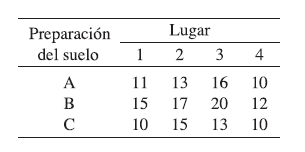



In [530]:
#Datos
Crecimiento=[11,13,16,10,15,17,20,12,10,15,13,10]
Suelo=['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C']
Lugar=[1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0]

In [531]:
df=pd.DataFrame({'Crecimiento':Crecimiento,'Suelo':Suelo,'Lugar':Lugar})
df

,Crecimiento,Suelo,Lugar
0,11,A,1.0
1,13,A,2.0
2,16,A,3.0
3,10,A,4.0
4,15,B,1.0
5,17,B,2.0
6,20,B,3.0
7,12,B,4.0
8,10,C,1.0
9,15,C,2.0


#Modelo con interacciones

In [532]:
formula='Crecimiento ~C(Lugar)+C(Suelo)+C(Lugar):C(Suelo)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                    df        sum_sq    mean_sq    F  PR(>F)
C(Lugar)           3.0  6.166667e+01  20.555556  0.0     NaN
C(Suelo)           2.0  3.800000e+01  19.000000  0.0     NaN
C(Lugar):C(Suelo)  6.0  1.133333e+01   1.888889  0.0     NaN
Residual           0.0  1.243245e-27        inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [533]:
#Use ANOVA with interaction, either with statsmodels...
formula='Crecimiento ~C(Lugar)+C(Suelo)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

           df     sum_sq    mean_sq          F    PR(>F)
C(Lugar)  3.0  61.666667  20.555556  10.882353  0.007693
C(Suelo)  2.0  38.000000  19.000000  10.058824  0.012124
Residual  6.0  11.333333   1.888889        NaN       NaN
0.012124158490119052


<ipython-input-533-ac7478a1fcb4>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [534]:
#... or with pingouin
pg_results = pg.anova(dv='Crecimiento', between=['Lugar','Suelo'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Lugar,61.666667,3,20.555556,1.0
1,Suelo,38.000000,2,19.000000,1.0
2,Lugar * Suelo,11.333333,6,1.888889,1.0
3,Residual,0.000000,0,NaN,NaN


Text(0.5, 1.0, 'Lugar vs Crecimiento')

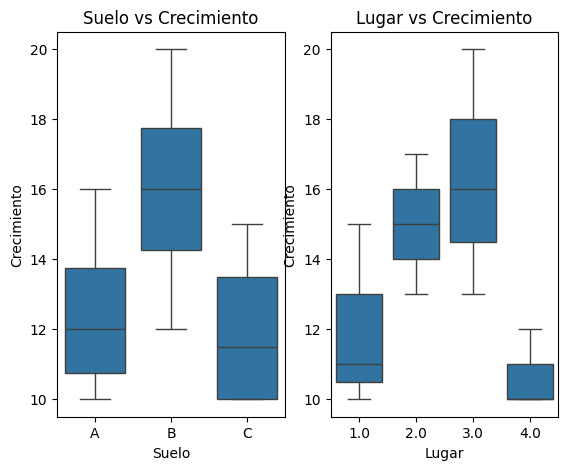

In [535]:
#Boxplot 1: Suelo vs Crecimiento
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(x='Suelo',y='Crecimiento',data=df)
plt.title('Suelo vs Crecimiento')
#Boxplot 2: Lugar vs Crecimiento
plt.subplot(1,3,2)
sns.boxplot(x='Lugar',y='Crecimiento',data=df)
plt.title('Lugar vs Crecimiento')


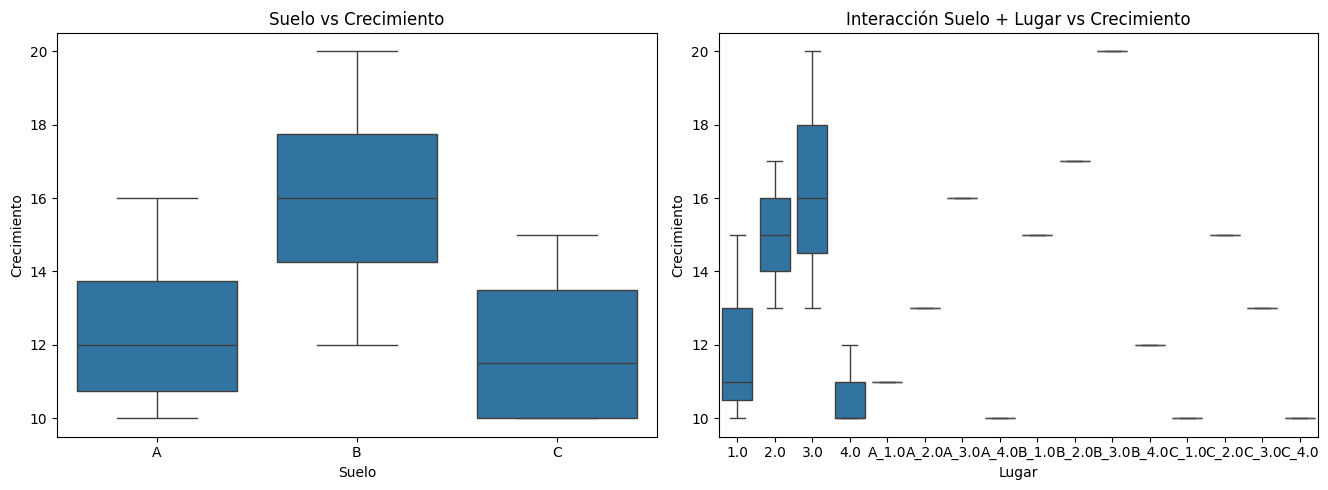

In [536]:
#Boxplot 1: Suelo vs Crecimiento
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='Suelo',y='Crecimiento',data=df)
plt.title('Suelo vs Crecimiento')

#Boxplot 2: Lugar vs Crecimiento
plt.subplot(1,3,2)
sns.boxplot(x='Lugar',y='Crecimiento',data=df)
plt.title('Lugar vs Crecimiento')

#Boxplot 3: Interacción Suelo + Lugar vs Crecimiento
df['Suelo'+'_'+'Lugar']=df['Suelo'].astype(str)+'_'+df['Lugar'].astype(str) #crear columna para la interacción
sns.boxplot(x='Suelo'+'_'+'Lugar',y='Crecimiento',data=df)
plt.title('Interacción Suelo + Lugar vs Crecimiento')

plt.tight_layout()
plt.show()

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *Lugar* y *Suelo*.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *Lugar* y *Suelo*, y la variable dependiente es *Crecimiento*. La interpretación de cada componenete es la siguiente:

## 1. C(Lugar)


*   **Grados de libertad (df):** 3.0, correspondientes a 4 lugares geográficos diferentes.
*   **Suma de cuadrados (sum_sq):** 61.666, que representa la variación explicada por el factor *Lugar*

*   **Media cuadrática(mean_sq):** 20.55, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 1.08823, que indica un impacto medianamente significativo del factor *Lugar*

*   **Valor p (PR(>F)):** 0.007693, abajo de 0.05, lo que significa que hay un efecto significativo sobre la variable dependiente.


##2. C(Suelo)

*   **Grados de libertad (df):** 2.0, correspondientes a 3 tipos de suelo distintos.

*   **Suma de cuadrados (sum_sq):** 38.00, que representa la variación explicada por las diferentes ubicaciones.

*   **Media cuadrática(mean_sq):** 19.00

*   **Valor F:** 10.058, que indica un impacto medianamente significativo por parte de *Suelo*

*   **Valor p(PR(>F)):** 0.01212, lo que indica que los tipos de suelo tienen un efecto altamente significativo sobre la variable dependiente.


#4. Residual:

*   **Grados de libertad(df):** 6.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 11.3333, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq):** 1.8888


#Conclusiones:

* Los factores **Lugar** y **Suelo** tienen un efecto significativo sobre la variable dependiente *Precio* (valor $p<0.05$).

* La variación residual no es muy alta, lo que significa que parte de la variación en los datos no es explicada por los factores incluidos en el análisis.














---



---



---

#Ejercicio 5

A. E. Dudeck y C. H. informaron sobre un experimento realizado para evaluar el rendimiento de varios céspedes de estación fría, para ver el efecto de siembra excesiva de *greens* de golf en invierno en el norte de Florida. Una de las variables de interés fue la distancia que una pelota de golf rodaría en un *green* después de hacerla bajar por una rampa (que se usa para inducir una velocidad inicial constante a la pelota). Debido a que la distancioa que la pelota rodaría estaba influida por la pendiente del *green* y la dirección en la que se podaba el césped, el experimento se realizó en un diseño de bloques aleatorizado.

Los bloques se determinaron para que las pendientes de los tramos individuales fueran constantes dentro de bloques y todos los tramos fueron podados en la misma dirección y a la misma altura para eliminar los efectos de la poda... Se usaron el mismo método de siembra y rapidez de aplicación para todos los céspedes que están representados en la siguiente tabla de datos:

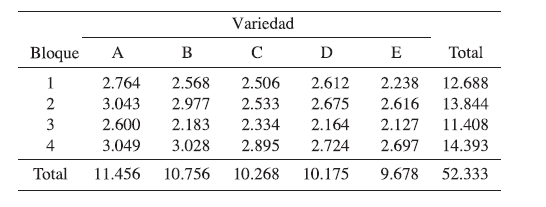

In [537]:
#Datos
Rendimiento=[2.764,2.568,2.506,2.612,2.238,3.043,2.977,2.533,2.675,2.616,2.600,2.183,2.334,2.164,2.127,2.049,3.028,2.895,2.724,2.697]
Bloque=[1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0]
Variedad=['A','B','C', 'D', 'E','A','B','C', 'D', 'E','A','B','C', 'D', 'E','A','B','C', 'D', 'E']

In [538]:
df=pd.DataFrame({'Rendimiento':Rendimiento,'Bloque':Bloque,'Variedad':Variedad})
df

,Rendimiento,Bloque,Variedad
0,2.764,1.0,A
1,2.568,1.0,B
2,2.506,1.0,C
3,2.612,1.0,D
4,2.238,1.0,E
5,3.043,2.0,A
6,2.977,2.0,B
7,2.533,2.0,C
8,2.675,2.0,D
9,2.616,2.0,E


#Modelo con interacciones

In [539]:
formula='Rendimiento ~C(Variedad)+C(Bloque)+C(Variedad):C(Bloque)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                         df        sum_sq   mean_sq    F  PR(>F)
C(Variedad)             4.0  1.575568e-01  0.039389  0.0     NaN
C(Bloque)               3.0  6.774741e-01  0.225825  0.0     NaN
C(Variedad):C(Bloque)  12.0  9.164816e-01  0.076373  0.0     NaN
Residual                0.0  5.837571e-29       inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [540]:
#Use ANOVA with interaction, either with statsmodels...
formula='Rendimiento ~C(Variedad)+C(Bloque)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

               df    sum_sq   mean_sq         F    PR(>F)
C(Variedad)   4.0  0.157557  0.039389  0.515745  0.725808
C(Bloque)     3.0  0.677474  0.225825  2.956848  0.075287
Residual     12.0  0.916482  0.076373       NaN       NaN
0.07528671398042867


<ipython-input-540-66228e4be121>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [541]:
#... or with pingouin
pg_results = pg.anova(dv='Rendimiento', between=['Variedad','Bloque'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Variedad,0.157557,4,0.039389,1.0
1,Bloque,0.677474,3,0.225825,1.0
2,Variedad * Bloque,0.916482,12,0.076373,1.0
3,Residual,0.000000,0,NaN,NaN


Text(0.5, 1.0, 'Variedad vs Rendimiento')

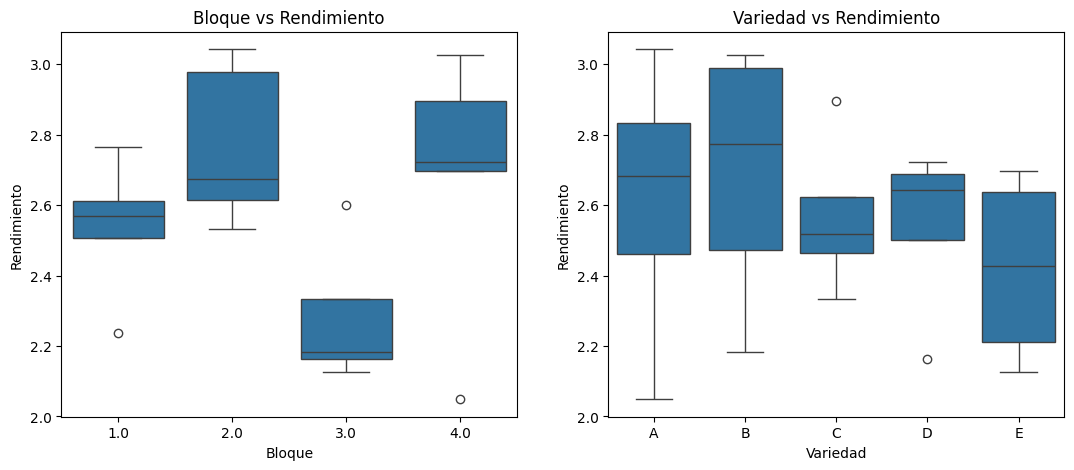

In [542]:
#Boxplot 1: Bloque vs Rendimiento
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='Bloque',y='Rendimiento',data=df)
plt.title('Bloque vs Rendimiento')
#Boxplot 2: Variedad vs Rendimiento
plt.subplot(1,3,2)
sns.boxplot(x='Variedad',y='Rendimiento',data=df)
plt.title('Variedad vs Rendimiento')


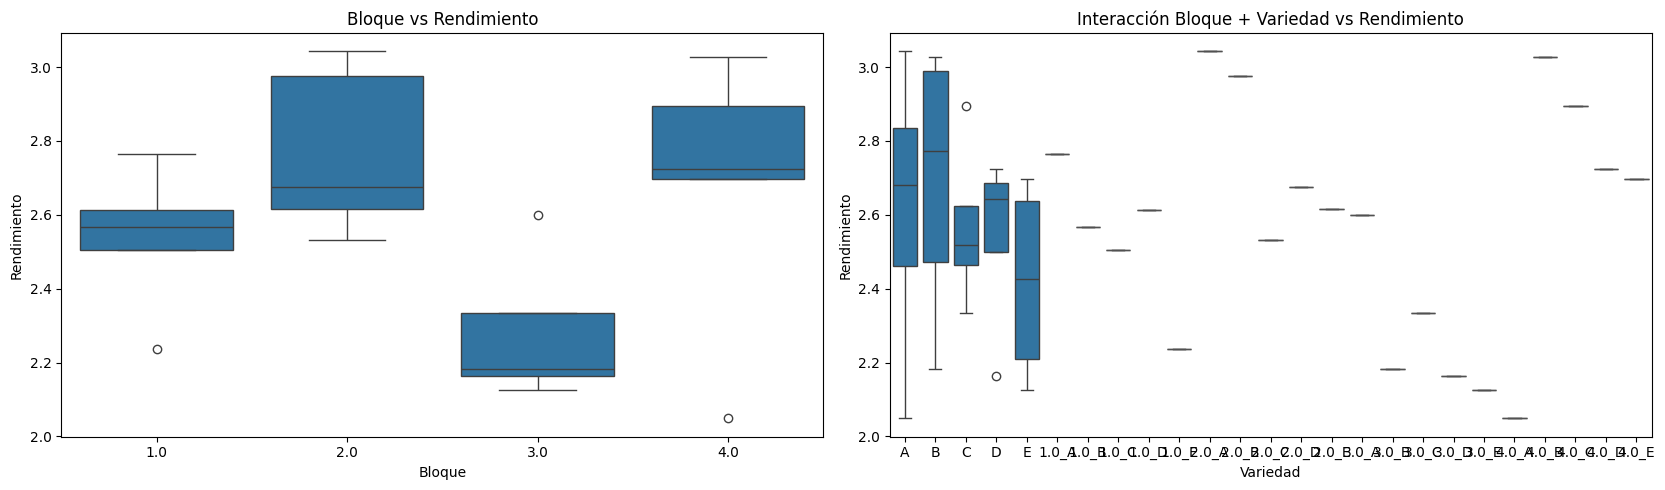

In [543]:
#Boxplot 1: Bloque vs Rendimiento
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(x='Bloque',y='Rendimiento',data=df)
plt.title('Bloque vs Rendimiento')

#Boxplot 2: Variedad vs Rendimiento
plt.subplot(1,3,2)
sns.boxplot(x='Variedad',y='Rendimiento',data=df)
plt.title('Variedad vs Rendimiento')

#Boxplot 3: Interacción Bloque + Variedad vs Rendimiento
df['Bloque'+'_'+'Variedad']=df['Bloque'].astype(str)+'_'+df['Variedad'].astype(str) #crear columna para la interacción
sns.boxplot(x='Bloque'+'_'+'Variedad',y='Rendimiento',data=df)
plt.title('Interacción Bloque + Variedad vs Rendimiento')

plt.tight_layout()
plt.show()

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *Bloque* y *Variedad*.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *Bloque* y *Variedad*, y la variable dependiente es *Rendimiento*. La interpretación de cada componenete es la siguiente:

## 1. C(Variedad)


*   **Grados de libertad (df):** 4.0, correspondientes a 5 variedades.
*   **Suma de cuadrados (sum_sq):** 0.15755, que representa la variación explicada por el factor *Variedad*

*   **Media cuadrática(mean_sq):** 0.03938, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 0.5157, que indica un impacto no significativo del factor *Variedad*

*   **Valor p (PR(>F)):** 0.7258, arriba de 0.05, lo que significa que no hay un efecto significativo sobre la variable dependiente.


##2. C(Bloque)

*   **Grados de libertad (df):** 3.0, correspondientes a 4 bloques.

*   **Suma de cuadrados (sum_sq):** 0.6774, que representa la variación explicada por las diferentes ubicaciones.

*   **Media cuadrática(mean_sq):** 0.2258

*   **Valor F:** 2.9568, que indica un impacto bajo por parte de *Bloque*

*   **Valor p(PR(>F)):** 0.075, lo que indica que los bloques no tienen un efecto significativo sobre la variable dependiente.


#4. Residual:

*   **Grados de libertad(df):** 12.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 0.9164, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq):** 0.076


#Conclusiones:

* Los factores **Variedad** y **Bloque** no tienen un efecto significativo sobre la variable dependiente *Rendimiento* (valor $p>0.05$).

* La variación residual no es muy alta, lo que significa que parte de la variación en los datos no es explicada por los factores incluidos en el análisis.














---



---



---
#Ejercicio 6

Suponga que ahora averiguamos que las 16 unidades experimentales se obtuvieron de la manera siguiente. Se tomó una muestra de cada uno de cuatro lugares, cada muestra individual se dividió en cuatro partes y luego cada método se aplicó a exactamente una parte de cada lugar (con la aleatorización apropiada). Los datos ahora se presentan de modo más correcto en la forma mostrada en la siguiente tabla:

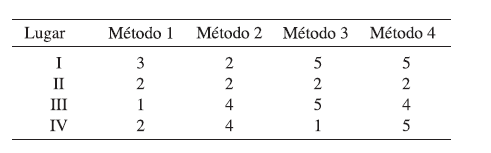


In [544]:
#Datos
Rendimiento=[3,2,5,5,2,2,2,2,1,4,5,4,2,4,1,5]
Lugar=[1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0]
Metodo=['A','B','C','D','A','B','C','D','A','B','C','D','A','B','C','D']

In [545]:
df=pd.DataFrame({'Rendimiento':Rendimiento,'Lugar':Lugar,'Metodo':Metodo})
df

,Rendimiento,Lugar,Metodo
0,3,1.0,A
1,2,1.0,B
2,5,1.0,C
3,5,1.0,D
4,2,2.0,A
5,2,2.0,B
6,2,2.0,C
7,2,2.0,D
8,1,3.0,A
9,4,3.0,B


#Modelo con interacciones

In [546]:
formula='Rendimiento ~C(Metodo)+C(Lugar)+C(Metodo):C(Lugar)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                     df        sum_sq   mean_sq    F  PR(>F)
C(Metodo)           3.0  8.187500e+00  2.729167  0.0     NaN
C(Lugar)            3.0  7.187500e+00  2.395833  0.0     NaN
C(Metodo):C(Lugar)  9.0  1.756250e+01  1.951389  0.0     NaN
Residual            0.0  7.201511e-27       inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [547]:
#Use ANOVA with interaction, either with statsmodels...
formula='Rendimiento ~C(Metodo)+C(Lugar)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

            df   sum_sq   mean_sq         F    PR(>F)
C(Metodo)  3.0   8.1875  2.729167  1.398577  0.305415
C(Lugar)   3.0   7.1875  2.395833  1.227758  0.355132
Residual   9.0  17.5625  1.951389       NaN       NaN
0.35513227538665304


<ipython-input-547-d6c5107295f8>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [548]:
#... or with pingouin
pg_results = pg.anova(dv='Rendimiento', between=['Metodo','Lugar'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Metodo,8.1875,3,2.729167,1.0
1,Lugar,7.1875,3,2.395833,1.0
2,Metodo * Lugar,17.5625,9,1.951389,1.0
3,Residual,0.0000,0,NaN,NaN


Text(0.5, 1.0, 'Metodo vs Rendimiento')

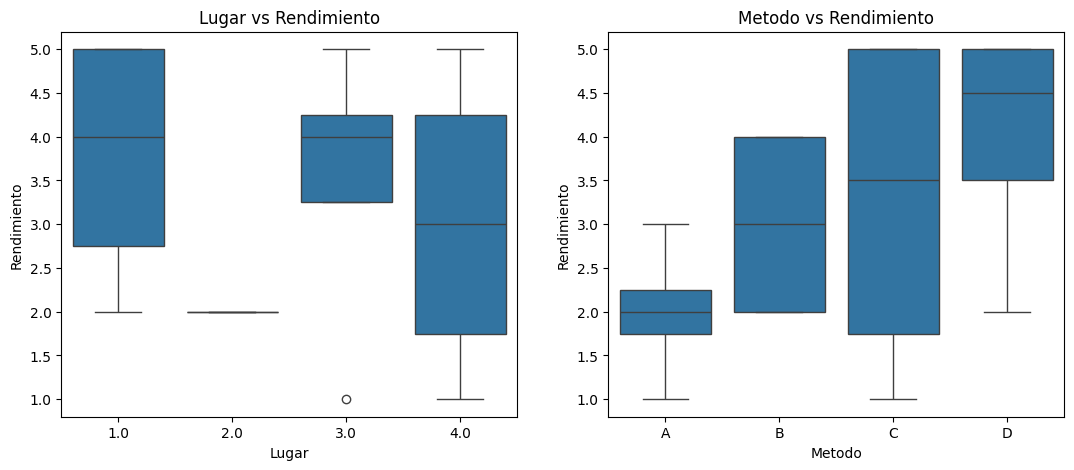

In [549]:
#Boxplot 1: Lugar vs Rendimiento
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='Lugar',y='Rendimiento',data=df)
plt.title('Lugar vs Rendimiento')
#Boxplot 2: Metodo vs Rendimiento
plt.subplot(1,3,2)
sns.boxplot(x='Metodo',y='Rendimiento',data=df)
plt.title('Metodo vs Rendimiento')


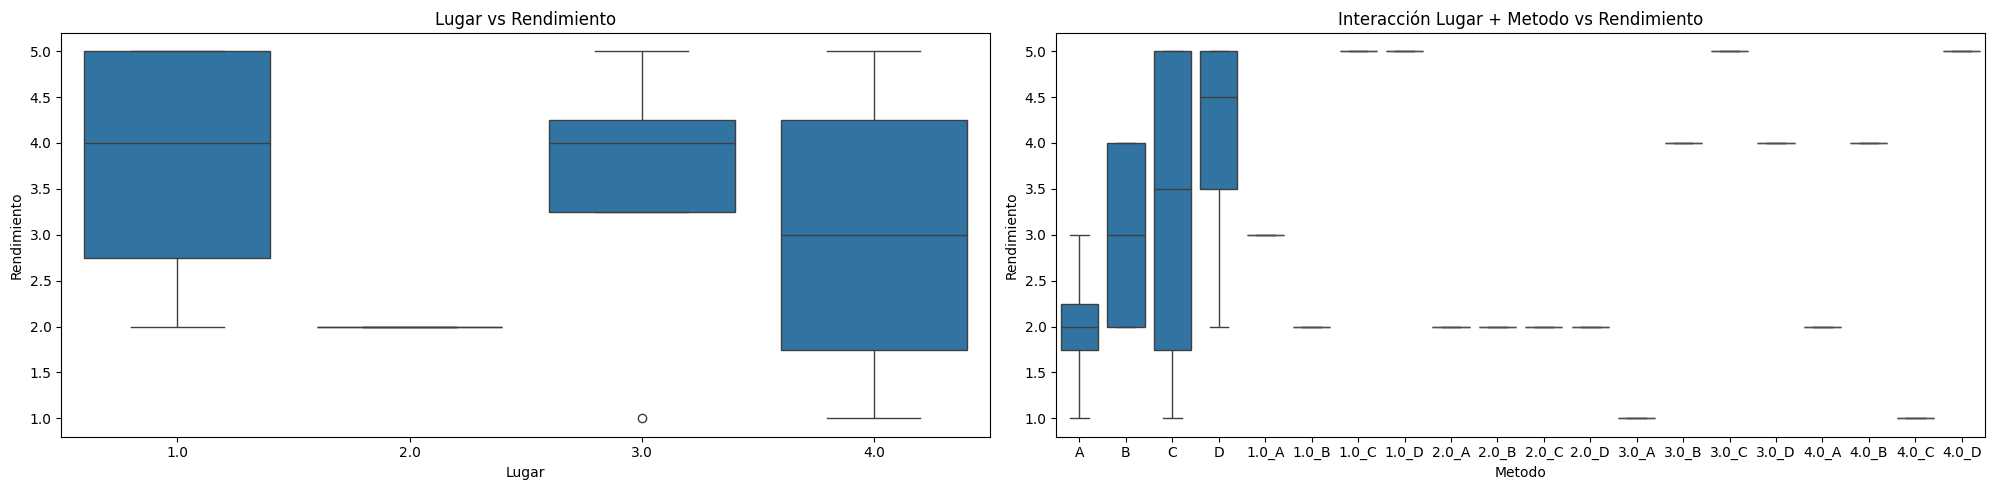

In [550]:
#Boxplot 1: Lugar vs Rendimiento
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
sns.boxplot(x='Lugar',y='Rendimiento',data=df)
plt.title('Lugar vs Rendimiento')

#Boxplot 2: Metodo vs Rendimiento
plt.subplot(1,3,2)
sns.boxplot(x='Metodo',y='Rendimiento',data=df)
plt.title('Metodo vs Rendimiento')

#Boxplot 3: Interacción Lugar + Metodo vs Rendimiento
df['Lugar'+'_'+'Metodo']=df['Lugar'].astype(str)+'_'+df['Metodo'].astype(str) #crear columna para la interacción
sns.boxplot(x='Lugar'+'_'+'Metodo',y='Rendimiento',data=df)
plt.title('Interacción Lugar + Metodo vs Rendimiento')

plt.tight_layout()
plt.show()

A continuación se presenta la tabla ANOVA generada para el análisis de los factores *Lugar* y *Método*.

## Interpretación de los resultados

La tabla presenta los resultados de un ANOVA de dos vías, donde las variables independientes son *Lugar* y *Método*, y la variable dependiente es *Rendimiento*. La interpretación de cada componenete es la siguiente:

## 1. C(Método)


*   **Grados de libertad (df):** 3.0, correspondientes 4 métodos.
*   **Suma de cuadrados (sum_sq):** 8.1875, que representa la variación explicada por el factor *Método*

*   **Media cuadrática(mean_sq):** 2.7291, que es la suma de cuadrados dividida por los grados de libertad
*   **Valor F:** 1.3985, que indica un impacto no significativo del factor *Método*

*   **Valor p (PR(>F)):** 0.3054, arriba de 0.05, lo que significa que no hay un efecto significativo sobre la variable dependiente.


##2. C(Lugar)

*   **Grados de libertad (df):** 3.0, correspondientes a 4 lugares geográficos.

*   **Suma de cuadrados (sum_sq):** 7.1875, que representa la variación explicada por las diferentes ubicaciones.

*   **Media cuadrática(mean_sq):** 2.3958

*   **Valor F:** 1.2277, que indica un impacto bajo por parte de *Lugar*

*   **Valor p(PR(>F)):** 0.3551, lo que indica que los lugares no tienen un efecto significativo sobre la variable dependiente.


#4. Residual:

*   **Grados de libertad(df):** 9.0, correspondientes al error residual.
*   **Suma de cuadrados (sum_sq):** 17.56, que representa la variación no explicada por los factores.
*   **Media cuadrática (mean_sq):** 1.9513


#Conclusiones:

* Los factores **Método** y **Lugar** no tienen un efecto significativo sobre la variable dependiente *Rendimiento* (valor $p>0.05$).












---



---



---

# Ejercicio 7
Se realiza una evaluación de adherentes de difusión de componenetes de aleación de circonio. El objetivo principal es determinar cuál de tres elementos: níquel, hierro o cobre, es el mejor agente de adherencia. Una serie de componentes de aleación de circonio se pegan usando cada uno de los posibles agentes de adherencia. Debido a una considerable variación en los componentes maquinados de diferentes lingotes, se emplea un diseño de bloques aleatorizado que bloquea los lingotes.
Dos componentes de cadalingote se pegan usand cada uno de los tres agentes y se mide la presión necesaria para separar los componentes pegados. Se obtienen los datos que se muestran en la tabla siguiente:

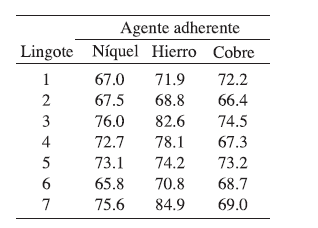

In [551]:
#Datos
Rendimiento=[67,71.9,72.2,67.5,58.8,66.4,76,82.6,74.5,72.7,78.1,67.3,73.1,74.2,73.2,65.8,70.8,68.7,75.6,84.9,69]
Lingote=[1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,6.0,6.0,7.0,7.0,7.0]
Agente=['A','B','C', 'A','B','C','A','B','C','A','B','C','A','B','C','A','B','C','A','B','C']

In [552]:
df=pd.DataFrame({'Rendimiento':Rendimiento,'Lingote':Lingote,'Agente':Agente})
df

,Rendimiento,Lingote,Agente
0,67.0,1.0,A
1,71.9,1.0,B
2,72.2,1.0,C
3,67.5,2.0,A
4,58.8,2.0,B
5,66.4,2.0,C
6,76.0,3.0,A
7,82.6,3.0,B
8,74.5,3.0,C
9,72.7,4.0,A


#Modelo con interacciones

In [553]:
formula='Rendimiento ~C(Agente)+C(Lingote)+C(Agente):C(Lingote)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                        df        sum_sq    mean_sq    F  PR(>F)
C(Agente)              2.0  7.132952e+01  35.664762  0.0     NaN
C(Lingote)             6.0  3.934324e+02  65.572063  0.0     NaN
C(Agente):C(Lingote)  12.0  2.270305e+02  18.919206  0.0     NaN
Residual               0.0  1.991716e-25        inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [554]:
#Use ANOVA with interaction, either with statsmodels...
formula='Rendimiento ~C(Agente)+C(Lingote)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

              df      sum_sq    mean_sq         F    PR(>F)
C(Agente)    2.0   71.329524  35.664762  1.885109  0.194116
C(Lingote)   6.0  393.432381  65.572063  3.465899  0.031796
Residual    12.0  227.030476  18.919206       NaN       NaN
0.031795546155850465


<ipython-input-554-1ddc3d4fdb46>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [555]:
#... or with pingouin
pg_results = pg.anova(dv='Rendimiento', between=['Agente','Lingote'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Agente,71.329524,2,35.664762,1.0
1,Lingote,393.432381,6,65.572063,1.0
2,Agente * Lingote,227.030476,12,18.919206,1.0
3,Residual,0.000000,0,NaN,NaN


Text(0.5, 1.0, 'Agente vs Rendimiento')

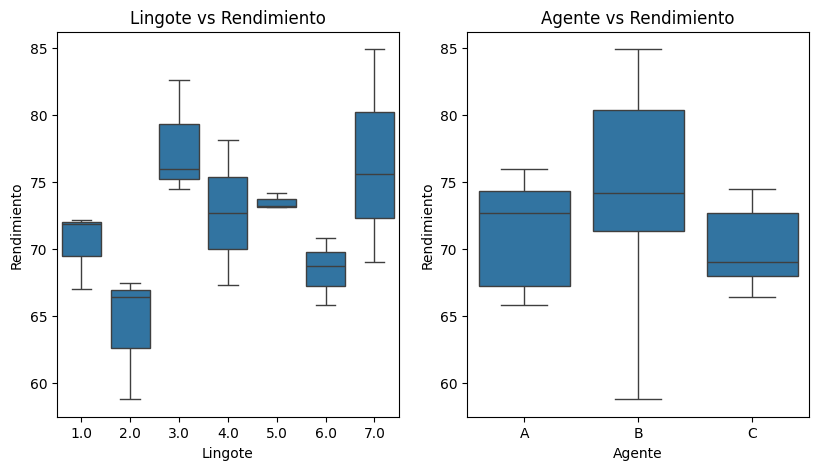

In [556]:
#Boxplot 1: Bloque vs Rendimiento
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='Lingote',y='Rendimiento',data=df)
plt.title('Lingote vs Rendimiento')
#Boxplot 2: Agente vs Rendimiento
plt.subplot(1,3,2)
sns.boxplot(x='Agente',y='Rendimiento',data=df)
plt.title('Agente vs Rendimiento')


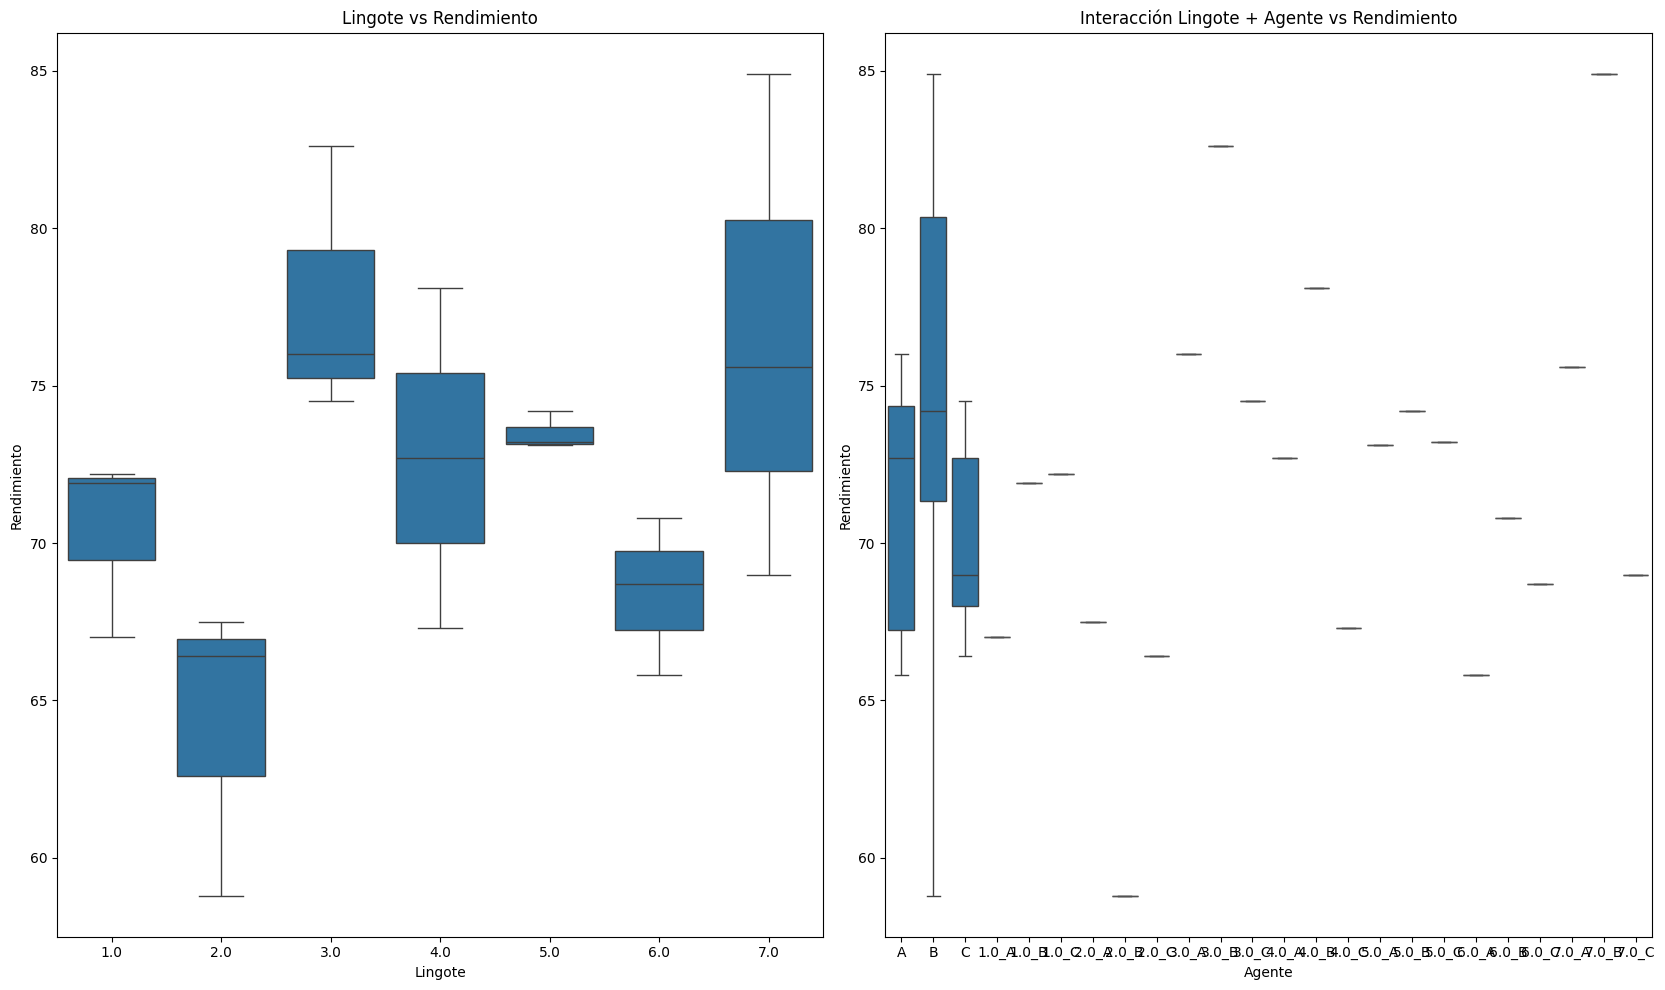

In [557]:
#Boxplot 1: Lingote vs Rendimiento
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.boxplot(x='Lingote',y='Rendimiento',data=df)
plt.title('Lingote vs Rendimiento')

#Boxplot 2: Agente vs Rendimiento
plt.subplot(1,3,2)
sns.boxplot(x='Agente',y='Rendimiento',data=df)
plt.title('Agente vs Rendimiento')

#Boxplot 3: Interacción Lingote + Agente vs Rendimiento
df['Lingote'+'_'+'Agente']=df['Lingote'].astype(str)+'_'+df['Agente'].astype(str) #crear columna para la interacción
sns.boxplot(x='Lingote'+'_'+'Agente',y='Rendimiento',data=df)
plt.title('Interacción Lingote + Agente vs Rendimiento')

plt.tight_layout()
plt.show()

# Conclusiones:

* El factor **Lingote** tiene efecto significativo sobre el *Rendimiento*, por otro lado...
* el factor **Agente** no tienen un efecto significativo sobre la variable dependiente *Rendimiento* (valor $p>0.05$).





---



---



---

#Ejercicio 8
De vez en cuando, una sucursal de una empresa debe hacer envíos a otra sucursal en otro estado. Tres servicios de entrega de paquetería operan las dos ciudades donde están ubicadas las oficinas sucursales. Debido a que las estructuras de precios de los tres servicios de entrega son muy semejantes, la empresa desea comparar los tiempos de entrega. La empresa piensa hacer varios tipos de envío diferentes a su sucursal. Para comparar los servicios de paquetería, la empresa remite cada envío por triplicado, uno con cada servicio de paquetería. Los resultados citados en la siguiente tabla son los tiempos de entrega en horas:

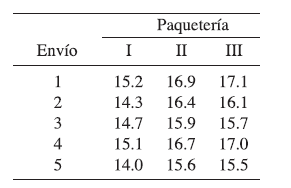

In [558]:
#Datos
Tiempo=[15.2,16.9,17.1,14.3,16.4,16.1,14.7,15.9,15.7,15.1,16.7,17.0,14.0,15.6,15.5]
Envio=[1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0]
Paqueteria=['A','B','C','A','B','C','A','B','C','A','B','C','A','B','C']

In [559]:
df=pd.DataFrame({'Tiempo':Tiempo,'Envio':Envio,'Paqueteria':Paqueteria})
df

,Tiempo,Envio,Paqueteria
0,15.2,1.0,A
1,16.9,1.0,B
2,17.1,1.0,C
3,14.3,2.0,A
4,16.4,2.0,B
5,16.1,2.0,C
6,14.7,3.0,A
7,15.9,3.0,B
8,15.7,3.0,C
9,15.1,4.0,A


#Modelo con interacciones

In [560]:
formula='Tiempo ~C(Paqueteria)+C(Envio)+C(Paqueteria):C(Envio)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)

                         df        sum_sq   mean_sq    F  PR(>F)
C(Paqueteria)           2.0  8.857333e+00  4.428667  0.0     NaN
C(Envio)                4.0  3.977333e+00  0.994333  0.0     NaN
C(Paqueteria):C(Envio)  8.0  4.226667e-01  0.052833  0.0     NaN
Residual                0.0  7.604619e-28       inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


Obtenemos el mismo ERROR que en el *Ejercicio 1*, por lo que vamos a probar con el...

# Modelo sin interacciones

In [561]:
#Use ANOVA with interaction, either with statsmodels...
formula='Tiempo ~C(Paqueteria)+C(Envio)'
lm = ols(formula,df).fit()
sm_results = anova_lm(lm)
print(sm_results)
#
print(sm_results['PR(>F)'][1])

                df    sum_sq   mean_sq          F    PR(>F)
C(Paqueteria)  2.0  8.857333  4.428667  83.823344  0.000004
C(Envio)       4.0  3.977333  0.994333  18.820189  0.000393
Residual       8.0  0.422667  0.052833        NaN       NaN
0.0003930287141643637


<ipython-input-561-93ef8bed8369>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sm_results['PR(>F)'][1])


# Análisis de la tabla de ANOVA

In [562]:
#... or with pingouin
pg_results = pg.anova(dv='Tiempo', between=['Paqueteria','Envio'],
                      data=df, detailed=True)
pg_results
#

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Paqueteria,8.857333,2,4.428667,1.0
1,Envio,3.977333,4,0.994333,1.0
2,Paqueteria * Envio,0.422667,8,0.052833,1.0
3,Residual,0.000000,0,NaN,NaN


Text(0.5, 1.0, 'Paqueteria vs Tiempo')

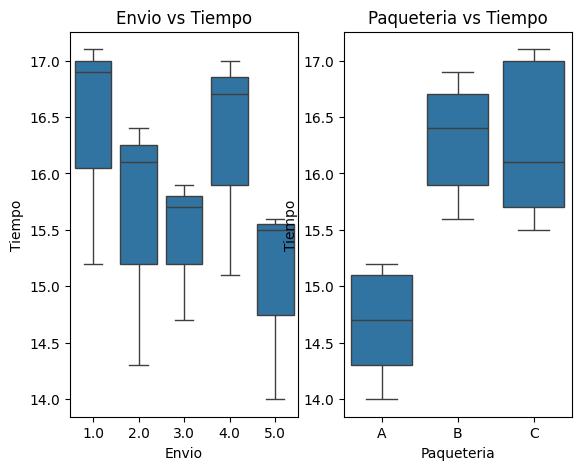

In [563]:
#Boxplot 1: Envio vs Tiempo
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(x='Envio',y='Tiempo',data=df)
plt.title('Envio vs Tiempo')
#Boxplot 2: Paqueteria vs Tiempo
plt.subplot(1,3,2)
sns.boxplot(x='Paqueteria',y='Tiempo',data=df)
plt.title('Paqueteria vs Tiempo')


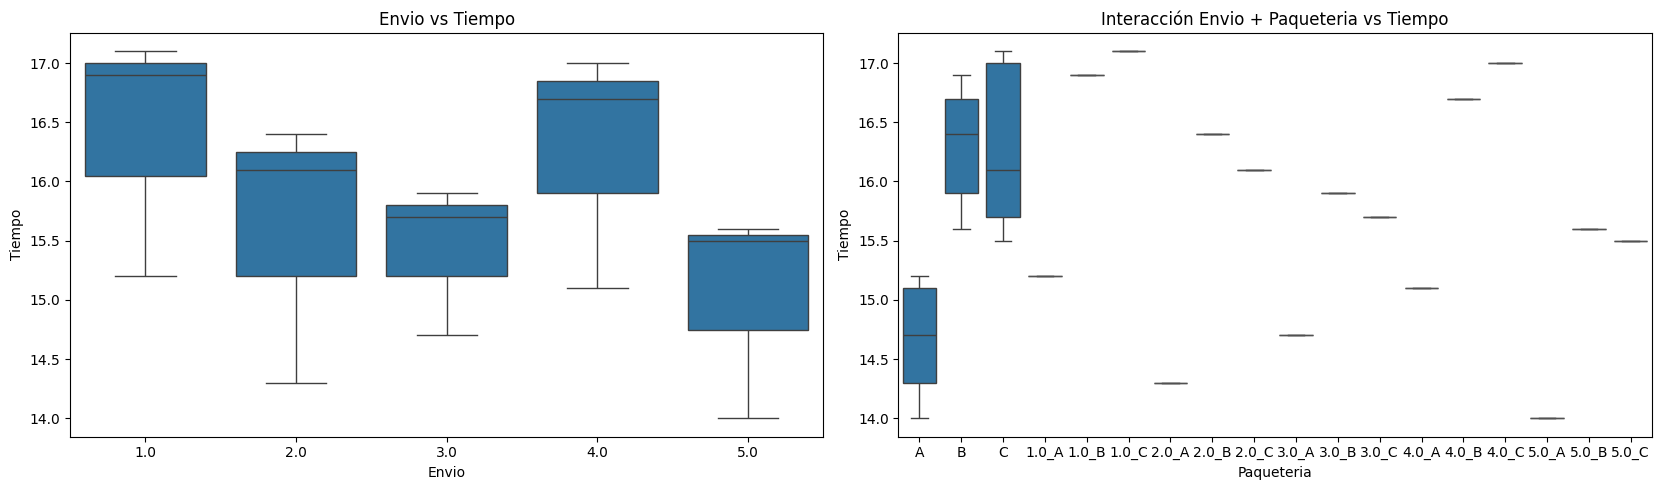

In [564]:
#Boxplot 1: Envio vs Tiempo
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(x='Envio',y='Tiempo',data=df)
plt.title('Envio vs Tiempo')

#Boxplot 2: Paqueteria vs Tiempo
plt.subplot(1,3,2)
sns.boxplot(x='Paqueteria',y='Tiempo',data=df)
plt.title('Paqueteria vs Tiempo')

#Boxplot 3: Interacción Envio + Paqueteria vs Tiempo
df['Envio'+'_'+'Paqueteria']=df['Envio'].astype(str)+'_'+df['Paqueteria'].astype(str) #crear columna para la interacción
sns.boxplot(x='Envio'+'_'+'Paqueteria',y='Tiempo',data=df)
plt.title('Interacción Envio + Paqueteria vs Tiempo')

plt.tight_layout()
plt.show()

# Conclusiones:

* Los factores **Envío** y **Paqetería** tienen un efecto  altamente significativo sobre el *Tiempo*, (valor $p<0.05$).

